<div class="alert alert-block alert-info">
    This script <b> filters out chemicals that were not found in PubChem database <code>pubchem_match!=No match</code></b>.
    <hr> 
    Note: <br>
    <i><b>Input file(s)' name(s) and metadata</b></i> (if available) are <b>printed out (below 👇🏼) in 'read data to df' section.</b>

In [1]:
# %env
# %who_ls
# %who
# %who int
# %pinfo <var name>

# Imports

In [1]:
%config IPCompleter.use_jedi = False # disable jedi autocompleter (https://stackoverflow.com/a/65734178/14485040)

import project_path  # makes possible the access to `src` directory using relative path
from src.data import internal_funcs
from src.utils import explore_dir, make_readme_info
from src.utils import read_excel_to_pandas as r_excel
from src.utils import set_outputs_dir
from src.utils import write_pandas_to_excel as w_excel

%run init_nb.ipynb

In [2]:
pd.options.display.max_columns = None

# INPUTS: Identify file(s) and read data to df

In [3]:
# Explore the directory to find the file(s)
inputs_dir, files_list = explore_dir(
    path_to_dir=r"..\data\lcaforsac", file_extension="xlsx", print_files_list=True
)

['data-extended-glo-markets-and-fu-kg.xlsx',
 'data-filtered-cpc-33to36-divisions.xlsx',
 'data-regrouped-cpc-divisions-into-3-categories.xlsx',
 'extended-data-chosen-methods-metadata-pubchem-properties.xlsx',
 'lcia-results-from-sp910-combined.xlsx',
 'mapped-lcia-results.xlsx',
 'pubchem-properties.xlsx',
 'raw-data-chosen-lcia-methods-and-metadata.xlsx',
 'to-check-regrouped-data-other-chemicals-category.xlsx']


In [5]:
# Read data
df_base_full = r_excel(inputs_dir, "data-extended-glo-markets-and-fu-kg.xlsx")
print(
    "df_base_full".ljust(40, "."), f"{df_base_full.shape}\n".rjust(13, "."),
)

# Get list of LCIA methods, TL PBs and list of metadata
METHODS = r_excel(
    inputs_dir,
    "data-extended-glo-markets-and-fu-kg.xlsx",
    sheets="METHODS",
    show_readme=False,
)["METHODS"].values.tolist()

# TL_METHODS = r_excel(
#     inputs_dir,
#     "data-extended-glo-markets-and-fu-kg.xlsx",
#     sheets="TL_METHODS",
#     show_readme=False,
# )["TL_METHODS"].values.tolist()

METADATA = r_excel(
    inputs_dir,
    "data-extended-glo-markets-and-fu-kg.xlsx",
    sheets="METADATA",
    show_readme=False,
)["METADATA"].values.tolist()


===> Trying to load 'readme' data... ===
File: data-extended-glo-markets-and-fu-kg.xlsx from
C:\Users\ViteksPC\Documents\00-ETH_projects\17-AESA_ecoinvent_chemicals\notebooks\0.40-vt-add-glo-markets-filter-kg-glo.ipynb
Generated on 2021-12-03 (Friday), 16:51:24 by Tulus, V.
Includes:
<<<
Sheet1: Extended dataframe, which includes pseudo-glo markets created from mass allocation of non-glo markets, and filtered by geo=GLO and FU=kg.
METADATA: list of relevant metadata used in Sheet1.
METHODS: list of LCIA methods used in Sheet1.
[METHODS + METADATA have to be the only column labels in Sheet1]
>>>

df_base_full............................ ...(668, 48)



# Operations

## Filter out activities not found in PubChem
<div class="alert alert-block alert-info">
    created: <code>df_base_full_in_pubchem</code>  
</div>

In [6]:
df_base_full_in_pubchem = df_base_full[df_base_full.num_matches != 0]

print(
    "Created **df_base_full_in_pubchem** dataframe is of {} shape.\n".format(
        df_base_full_in_pubchem.shape
    )
)
df_base_full_in_pubchem.sample(2)

Created **df_base_full_in_pubchem** dataframe is of (492, 48) shape.



,Activity,category_regrouped,activity_comment,type,referenceProduct,category,inline_comment,geo,activity_ISICclass,activity_ecoSpold01class,technologyLevel,referenceProductAmount,referenceProductUnit,referenceProduct_prodVolume,referenceProduct_prodVolumeComment,referenceProduct_price,referenceProduct_priceUnit,referenceProduct_priceComment,referenceProduct_casNumber,referenceProduct_CPCclass,activity_generalComment,sourceFilename,MF,MW,complexity,iupac,num_matches,pubchem_match,synonyms,"('IPCC 2013 GWP 100a V1.03', 'IPCC GWP 100a', 'kg CO2 eq')","('ReCiPe 2016 Midpoint (H) V1.03 / World (2010) H', 'Global warming', 'kg CO2 eq')","('ReCiPe 2016 Midpoint (H) V1.03 / World (2010) H', 'Stratospheric ozone depletion', 'kg CFC11 eq')","('ReCiPe 2016 Midpoint (H) V1.03 / World (2010) H', 'Ionizing radiation', 'kBq Co-60 eq')","('ReCiPe 2016 Midpoint (H) V1.03 / World (2010) H', 'Ozone formation, Human health', 'kg NOx eq')","('ReCiPe 2016 Midpoint (H) V1.03 / World (2010) H', 'Fine particulate matter formation', 'kg PM2.5 eq')","('ReCiPe 2016 Midpoint (H) V1.03 / World (2010) H', 'Ozone formation, Terrestrial ecosystems', 'kg NOx eq')","('ReCiPe 2016 Midpoint (H) V1.03 / World (2010) H', 'Terrestrial acidification', 'kg SO2 eq')","('ReCiPe 2016 Midpoint (H) V1.03 / World (2010) H', 'Freshwater eutrophication', 'kg P eq')","('ReCiPe 2016 Midpoint (H) V1.03 / World (2010) H', 'Marine eutrophication', 'kg N eq')","('ReCiPe 2016 Midpoint (H) V1.03 / World (2010) H', 'Terrestrial ecotoxicity', 'kg 1,4-DCB')","('ReCiPe 2016 Midpoint (H) V1.03 / World (2010) H', 'Freshwater ecotoxicity', 'kg 1,4-DCB')","('ReCiPe 2016 Midpoint (H) V1.03 / World (2010) H', 'Marine ecotoxicity', 'kg 1,4-DCB')","('ReCiPe 2016 Midpoint (H) V1.03 / World (2010) H', 'Human carcinogenic toxicity', 'kg 1,4-DCB')","('ReCiPe 2016 Midpoint (H) V1.03 / World (2010) H', 'Human non-carcinogenic toxicity', 'kg 1,4-DCB')","('ReCiPe 2016 Midpoint (H) V1.03 / World (2010) H', 'Land use', 'm2a crop eq')","('ReCiPe 2016 Midpoint (H) V1.03 / World (2010) H', 'Mineral resource scarcity', 'kg Cu eq')","('ReCiPe 2016 Midpoint (H) V1.03 / World (2010) H', 'Fossil resource scarcity', 'kg oil eq')","('ReCiPe 2016 Midpoint (H) V1.03 / World (2010) H', 'Water consumption', 'm3')"
390,"Trichloroethylene {GLO}| market for | APOS, S",Organic chemical,Production volume: 347701149.425287 kgInclu...,Products,Trichloroethylene,Chemicals\Organic\Market,Production Volume Amount: 347701149.425287,GLO,2011:Manufacture of basic chemicals,chemicals/organics,0.0,1,kg,3.477011e+08,NaN,1.57,EUR2005,Calculated based on inputs: The price of the p...,NaN,"34110: Hydrocarbons and their halogenated, sul...",NaN,23434_68550588-f81b-4810-964a-6244f0ebb3ff_e75...,C2HCl3,131.380,42.9,"1,1,2-trichloroethene",1.0,by NAME,"['TRICHLOROETHYLENE', 'Trichloroethene', '79-0...",3.857404,3.926485,3.446131e-06,0.403268,0.013904,0.008295,0.016821,0.014261,0.002058,0.000180,11.140894,0.130907,0.183951,0.177334,3.794730,0.074329,0.011192,1.237851,0.083163
510,"Carbon dioxide, liquid, combined to GLO market",Inorganic chemical,NaN,Products,"Carbon dioxide, liquid",Chemicals\Gases\Liquified\Market,NaN,GLO,2011:Manufacture of basic chemicals,chemicals/inorganics,0.0,1,kg,2.720000e+10,NaN,0.11,EUR2005,NaN,NaN,"34210: Hydrogen, nitrogen, oxygen, carbon diox...","Combined activity, mass allocated from RER, Ro...",NaN,CO2,44.009,18.3,NaN,1.0,by NAME,"['carbon dioxide', 'carbonic anhydride', 'Dry ...",0.880880,0.945394,2.237392e-07,0.049582,0.001165,0.001092,0.001184,0.002058,0.000298,0.000054,6.082625,0.025201,0.034910,0.026823,0.767766,0.014034,0.002596,0.166166,0.005030


category_regrouped
Organic chemical      262
Inorganic chemical    151
Other chemical         79
dtype: int64
Total:  492

Shares in % for  category_regrouped
Inorganic chemical    30.69
Organic chemical      53.25
Other chemical        16.06
dtype: float64


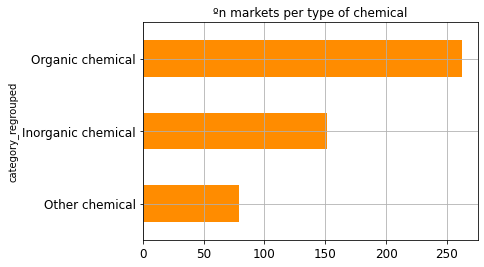

In [7]:
# Grouping by 'category_regrouped' and ploting the size of each group on a barh plot (in one line)
internal_funcs.plot_categories(
    df_in=df_base_full_in_pubchem,
    groupby="category_regrouped",
    color="darkorange",
    fontsize=12,
)

In [8]:
# Make df of METADATA, METHODS, and TL_METHODS for later export
df_metadata = pd.DataFrame(METADATA, columns=["METADATA"])
df_methods = pd.DataFrame(METHODS, columns=["METHODS"])
# df_tl_methods = pd.DataFrame(TL_METHODS, columns=["TL_METHODS"])

# OUTPUTS: Export data to excel

In [9]:
%%time

# Set output directory
outputs_dir = set_outputs_dir(use_default=False, rel_path_output=r"..\data\lcaforsac")  # default `..\data\interim`

## Export dataframe to excel
excelName = "data-full-only-in-pubchem.xlsx"

df_readme = make_readme_info(
    excelName,
    "Sheet1: Dataframe with columns as specified below, "
    "filtered only for chemicals found in PubChem database."
    "\nMETADATA: list of relevant metadata used in Sheet1."
    "\nMETHODS: list of LCIA methods used in Sheet1."
#     "\nTL_METHODS: list of TL in PBs used in Sheet1."
    "\n[METHODS + METADATA"
#     "+ TL_METHODS "
    " have to be the only column labels in Sheet1]",
)

w_excel(
    path_to_file=outputs_dir,
    filename=excelName,
    dict_data_to_write={
        "Sheet1": df_base_full_in_pubchem,
        "METADATA": df_metadata,
        "METHODS": df_methods,
#         "TL_METHODS": df_tl_methods,
    },
    readme_info=("readme", df_readme),
    #     ExcelWriter_kwargs={"engine": "openpyxl", "encoding": "UTF-8"}
    #     startrow=0
)

File: data-full-only-in-pubchem.xlsx successfully created in 
C:\Users\ViteksPC\Documents\00-ETH_projects\17-AESA_ecoinvent_chemicals\data\lcaforsac
Wall time: 759 ms
